# ***IMPORTING DATASET FROM MY KAGGLE ACCOUNT***

In [2]:
!pip install q kaggle

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"habib3034","key":"3dad1a2f1ee8899839f06afdf58ded14"}'}

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset      Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          20328        421  1.0              
valakhorasani/gym-members-exercise-dataset                       Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38          11518        176  1.0              
muhammadroshaanriaz/students-performance-dataset-cleaned         Students Performance | Clean Dataset            10KB  2024-10-29 19:32:26           1639         35  1.0              
mahdiehhajian/life-expectancy-around-the-world                   Life expectancy

In [9]:
!kaggle datasets download -d habib3034/balanced-dataset-from-potrika

Dataset URL: https://www.kaggle.com/datasets/habib3034/balanced-dataset-from-potrika
License(s): DbCL-1.0
 98% 204M/208M [00:06<00:00, 36.0MB/s]
100% 208M/208M [00:06<00:00, 34.6MB/s]


In [10]:
! unzip /content/balanced-dataset-from-potrika.zip

Archive:  /content/balanced-dataset-from-potrika.zip
  inflating: BanglaArticle.csv       


In [11]:
path = "/content/BanglaArticle.csv"

In [12]:
data = pd.read_csv("/content/BanglaArticle.csv", encoding_errors='ignore')

In [13]:
data

,cleanedwithoutstopwords,category
0,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,Economy
1,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা ...,Economy
2,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারেন্...,Economy
3,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ বৈরী...,Economy
4,মোবাইলফোনে কথা বলায় খরচ বাড়ছে বাজেটে মোবাইলফোন...,Economy
...,...,...
324135,পরবর্তী কর্মসূচি দেয়া সারাদেশে টানা অবরোধের ডা...,politics
324136,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববিদ্য...,politics
324137,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান রুহুল আমিন...,politics
324138,তথ্যমন্ত্রী জাসদ সভাপতি হাসানুল হক ইনু নির্বাচ...,politics


# ***DATA PREPARATION***

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import Callback
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Total number of headlines: 324140


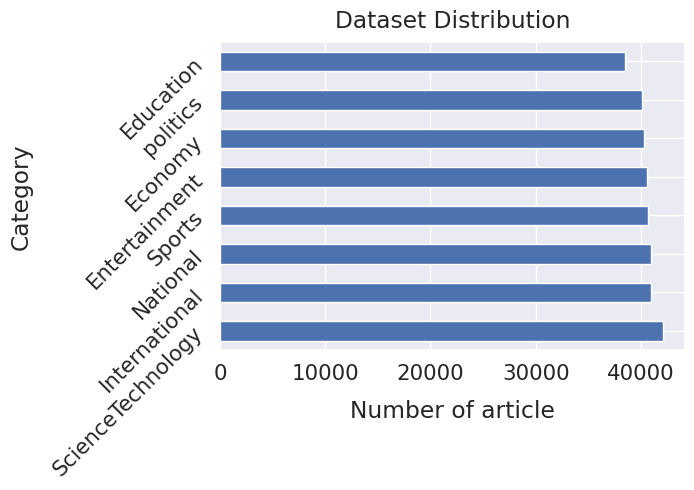

In [15]:
# data = pd.read_csv(path+'headlines.csv',encoding='utf-8')
data = pd.read_csv(path,encoding='utf-8')
print(f'Total number of headlines: {len(data)}')
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of article", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [16]:
data = data[['cleanedwithoutstopwords','category']]

In [17]:
data['category'].unique()

array(['Economy', 'Education', 'Entertainment', 'International',
       'National', 'ScienceTechnology', 'Sports', 'politics'],
      dtype=object)

In [18]:
data

,cleanedwithoutstopwords,category
0,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,Economy
1,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা ...,Economy
2,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারেন্...,Economy
3,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ বৈরী...,Economy
4,মোবাইলফোনে কথা বলায় খরচ বাড়ছে বাজেটে মোবাইলফোন...,Economy
...,...,...
324135,পরবর্তী কর্মসূচি দেয়া সারাদেশে টানা অবরোধের ডা...,politics
324136,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববিদ্য...,politics
324137,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান রুহুল আমিন...,politics
324138,তথ্যমন্ত্রী জাসদ সভাপতি হাসানুল হক ইনু নির্বাচ...,politics


In [19]:
# Define the number of samples per category
n_samples = 5000

# Sample 5000 articles from each category
sampled_df = data.groupby('category').apply(lambda x: x.sample(n=n_samples, random_state=42)).reset_index(drop=True)

# Verify the number of samples per category
print(sampled_df['category'].value_counts())

# Save the sampled dataset to a new CSV file
# sampled_df.to_csv('sampled_dataset.csv', index=False)

category
Economy              5000
Education            5000
Entertainment        5000
International        5000
National             5000
ScienceTechnology    5000
Sports               5000
politics             5000
Name: count, dtype: int64


In [20]:
data = sampled_df

In [21]:
data

,cleanedwithoutstopwords,category
0,অর্থনৈতিক রিপোর্টার মিডল্যান্ড ব্যাংক লিমিটেড ...,Economy
1,বাণিজ্য ভারসাম্যে ঘাটতি রেমিট্যান্স প্রবাহ হ্র...,Economy
2,সিরাজগঞ্জের বেলকুচিতে গত সোমবার মাইচয়েস মাইওয়া...,Economy
3,ঈদুল আজহার ন্যূনতম দিনের বাংলাদেশ ভারতসহ দেশেই...,Economy
4,প্রধানমন্ত্রীর কার্যালয়ের সচিব মো তোফাজ্জল হোস...,Economy
...,...,...
39995,যুগ্ম সচিব পদে পদোন্নতির ঘটনাকে সম্পূর্ণভাবে স...,politics
39996,জাতীয় সংসদকে পুতুল নাচের নাট্যশালা বলায় ট্রান্...,politics
39997,সাবেক মন্ত্রী ওয়ার্কার্স পার্টির সভাপতি রাশেদ...,politics
39998,বিএনপির ভারপ্রাপ্ত চেয়ারম্যান তারেক রহমান সংস...,politics


In [22]:
import pandas as pd
import numpy as np


# Calculate the unique words in 'cleanedwithoutstopwords' column
unique_words = set()
for article in data['cleanedwithoutstopwords'].astype(str):
    words = article.split()
    unique_words.update(words)

total_unique_words = len(unique_words)

# Calculate the highest length of articles
article_lengths = [len(article.split()) for article in data['cleanedwithoutstopwords'].astype(str)]
max_article_length = max(article_lengths)

print(f"Total unique words: {total_unique_words}")
print(f"Highest article length: {max_article_length}")

Total unique words: 241597
Highest article length: 5371


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
data['category_encoded'] = label_encoder.fit_transform(data['category'])

# View the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Now you have the category labels encoded in the 'category_encoded' column
texts = data['cleanedwithoutstopwords'].astype(str).values  # Text data
labels = data['category_encoded'].values  # Encoded labels

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


Label Mapping: {'Economy': 0, 'Education': 1, 'Entertainment': 2, 'International': 3, 'National': 4, 'ScienceTechnology': 5, 'Sports': 6, 'politics': 7}


# ***GRU MODEL***

In [25]:

# Tokenize the text
max_vocab_size = 251597  # Define maximum vocabulary size
max_sequence_length = 1000  # Define maximum sequence length for padding

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure equal length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Convert labels to categorical format
num_classes = len(np.unique(labels))
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

In [26]:
# Build the GRU model
embedding_dim = 1024  # Dimension of embedding vector
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(64))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Check the distribution of labels
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5  # Adjust based on training needs
history = model.fit(X_train_padded, y_train_categorical, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test_categorical), class_weight=class_weights_dict)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 257635328 elements. This may consume a large amount of memory.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 321ms/step - accuracy: 0.5401 - loss: 1.3450 - val_accuracy: 0.8745 - val_loss: 0.4168
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 140s 329ms/step - accuracy: 0.9245 - loss: 0.2639 - val_accuracy: 0.8692 - val_loss: 0.4428
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 333ms/step - accuracy: 0.9757 - loss: 0.0969 - val_accuracy: 0.8689 - val_loss: 0.5399
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 338ms/step - accuracy: 0.9904 - loss: 0.0401 - val_accuracy: 0.8596 - val_loss: 0.6394
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 335ms/step - accuracy: 0.9958 - loss: 0.0188 - val_accuracy: 0.8574 - val_loss: 0.7282


ACCURACY OF GRU MODEL

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')



250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8576 - loss: 0.7252
Test Accuracy: 85.74%


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step


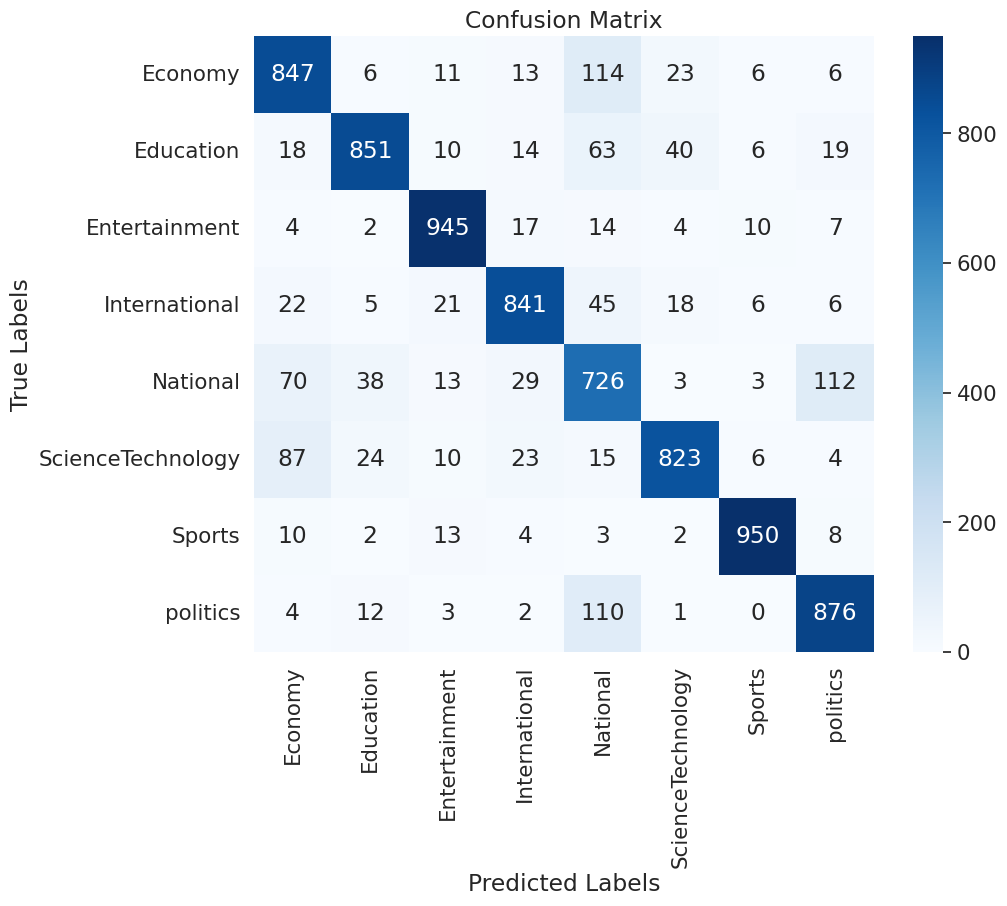

                   precision    recall  f1-score   support

          Economy       0.80      0.83      0.81      1026
        Education       0.91      0.83      0.87      1021
    Entertainment       0.92      0.94      0.93      1003
    International       0.89      0.87      0.88       964
         National       0.67      0.73      0.70       994
ScienceTechnology       0.90      0.83      0.86       992
           Sports       0.96      0.96      0.96       992
         politics       0.84      0.87      0.86      1008

         accuracy                           0.86      8000
        macro avg       0.86      0.86      0.86      8000
     weighted avg       0.86      0.86      0.86      8000



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the categories for the test set
y_pred_probs = model.predict(X_test_padded)  # Predict probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)     # Convert probabilities to class labels

# Convert one-hot encoded test labels back to single integer labels
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for precision, recall, f1-score
print(classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))


In [29]:
import numpy as np

# Function to preprocess and predict the category of a new sentence
def predict_category(text):
    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Get prediction from the model
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label



# Example sentences for each category (these are placeholders, replace with actual examples if available)
example_sentences = [
    "চলতি বছরের জানুয়ারি থেকে সেপ্টেম্বর পর্যন্ত ৯ মাসে সিটি ব্যাংকের সমন্বিত পরিচালন মুনাফা বেড়েছে। গত বছরের একই সময়ে তুলনায় পরিচালনা মুনাফা বেড়েছে ৭৭ শতাংশ। ২০২৩ সালের প্রথম ৯ মাসে সিটি ব্যাংক মুনাফা করেছিল ৯৩২ কোটি টাকা; এবার তা বেড়ে দাঁড়িয়েছে ১ হাজার ৬৫৩ কোটি টাকা। সতর্কতার সঙ্গে ঋণের বিপরীতে বেশি প্রভিশন সংরক্ষণের কারণে কর–পরবর্তী মুনাফা বেড়েছে ১৯ শতাংশ। গত বছর প্রথম ৯ মাসে এ মুনাফা ছিল ৩৭৯ কোটি টাকা, এবার যা বেড়ে দাঁড়িয়েছে ৪৫১ কোটি টাকা। খবর বিজ্ঞপ্তি।",  # Economy


    "শিক্ষার্থীদের রাস্তায় জনদুর্ভোগ তৈরি না করে ধৈর্য ধরার ও নিজ নিজ শিক্ষাঙ্গনে ফিরে যাওয়ার অনুরোধ করেছেন শিক্ষা উপদেষ্টা অধ্যাপক ওয়াহিদউদ্দিন মাহমুদ। ঢাকার সাত কলেজের শিক্ষার্থীদের আন্দোলন এবং অন্যান্য শিক্ষাসংশ্লিষ্ট বিষয়ে  আন্দোলন শিক্ষা ও পরিকল্পনা উপদেষ্টা ওয়াহিদউদ্দিন মাহমুদ আজ এক বিবৃতিতে এ আহ্বান জানান। আজ বুধবার এ বিবৃতি দেন শিক্ষা উপদেষ্টা।বিবৃতিতে বলা হয়, অন্তর্বর্তী সরকার গঠনের পর থেকেই বিভিন্ন শিক্ষাপ্রতিষ্ঠানের ছাত্র এবং বিভিন্ন শিক্ষক সংগঠন নানা দাবি নিয়ে আন্দোলন করে যাচ্ছে। একটি সম্পূর্ণ বিশৃঙ্খল অবস্থা পাওয়া শিক্ষা খাতে শৃঙ্খলা ও স্বাভাবিক পরিবেশ ফিরিয়ে আনার জন্য সরকার যথাসাধ্য চেষ্টা করছে। এসব দাবিদাওয়ার মধ্যে ন্যায্য-অন্যায্য এবং কিছু ক্ষেত্রে পরস্পরবিরোধী দাবিও আছে। একটি বৈষম্যবিরোধী দাবি মানলে অন্যান্য ক্ষেত্রে বৈষম্য তৈরি হতে পারে। শিক্ষা খাতের যেকোনো গুরুত্বপূর্ণ সংস্কারের দাবি পূরণের সুদূরপ্রসারী প্রভাব থাকে এবং এর জন্য তাৎক্ষণিক সমাধান দেওয়া কঠিন। অথচ সব কটি দাবির পেছনের আন্দোলনকারীরা তাঁদের দাবিকেই সবচেয়ে অগ্রাধিকার হিসেবে দেখছেন এবং দাবিগুলোকে শুধু রাস্তায় আন্দোলন করে তাৎক্ষণিক সমাধানযোগ্য মনে করছেন। এতে একদিকে যেমন রাস্তা অবরোধের ফলে অপরিসীম জনদুর্ভোগ হচ্ছে, সরকারও দাবিগুলো যথাযথ বিবেচনার সুযোগ পাচ্ছে না।",  # Education


    "পুরোমাত্রার বাণিজ্যিক ছবিতে তাঁকে যেমন দেখা যায়, তেমনি করেছেন ভিন্ন ধারার ছবিও। তাই ‘রকি অউর রানি কি প্রেমকাহিনি’ যেমন করেছেন, তেমনি আলিয়াকে পাওয়া গেছে ‘হাইওয়ে’ বা ‘রাজি’র মতো সিনেমায়। তবে একটা ক্ষেত্রে আলিয়া ভাটের আলাদা সুখ্যাতি ছিল, তাঁর অভিনীত সিনেমা মানেই বক্স অফিসে নিশ্চিত ১০০ কোটি আয়। এবার অবশ্য এ নিয়মের ব্যতিক্রম হলো।",  # Entertainment

    "যুক্তরাষ্ট্রের প্রেসিডেন্ট নির্বাচনে দোদুল্যমান অঙ্গরাজ্যগুলোর মধ্যে পেনসিলভানিয়া ও মিশিগান তুলনামূলকভাবে বেশি গুরুত্বপূর্ণ। ডেমোক্রেটিক পার্টির প্রেসিডেন্ট প্রার্থী কমলা হ্যারিস নির্বাচনী প্রচারণা শেষ করেছেন পেনসিলভানিয়াতে। আর রিপাবলিকান পার্টির প্রার্থী ডোনাল্ড ট্রাম্প প্রচারণা শেষ করেছেন মিশিগানে। বলা হয়, দোদুল্যমান সাতটি অঙ্গরাজ্য মার্কিন প্রেসিডেন্ট নির্বাচনের ফল নির্ধারণ করে দেয়। এ সাত অঙ্গরাজ্যের মধ্যে পেনসিলভানিয়া ও মিশিগানের প্রাথমিক গুরুত্ব হলো তাদের ইলেকটোরাল কলেজ ভোট ও সাধারণ (পপুলার) ভোটের সংখ্যা।",  # International

    "চট্টগ্রামের সীতাকুণ্ডের ভাটিয়ারী ইউনিয়নের শহীদ মিনার এলাকায় ঢাকা-চট্টগ্রাম মহাসড়ক প্রায় পৌনে দুই ঘণ্টা ধরে অবরোধ করে রেখেছিলেন স্থানীয় বাসিন্দারা। আজ মঙ্গলবার দুপুর ১২টার দিকে ওই এলাকার বাসিন্দারা মহাসড়কে অবস্থান নিয়ে যানবাহন চলাচল বন্ধ করে দেন। প্রশাসন বলছে, একটি বাড়ির রাস্তা নিয়ে সেনাবাহিনীর সঙ্গে স্থানীয় লোকজনের বিরোধের জের ধরে এ অবরোধ করা হয়। পরে বেলা পৌনে দুইটার দিকে প্রশাসনের আশ্বাসে মহাসড়ক থেকে অবরোধ তুলে নেন তাঁরা। অবরোধের ফলে মহাসড়কের উভয় দিকে অন্তত ৩০ কিলোমিটার এলাকায় যানজটের সৃষ্টি হয়।",  # National

    "অ্যান্ড্রয়েড অপারেটিং সিস্টেমে চলা স্মার্টফোনের বিভিন্ন সুবিধা ব্যবহার করা যায় না অ্যাপলের তৈরি আইফোন এবং ম্যাক কম্পিউটারে। আর তাই আইওএস অপারেটিং সিস্টেমে চলা আইফোন ও ম্যাক কম্পিউটারের জন্য নিজেদের জনপ্রিয় ফাইল শেয়ারিং সুবিধা ‘কুইক শেয়ার’ উন্মুক্ত করতে যাচ্ছে গুগল। নতুন এ সুবিধা চালু হলে আইফোন ও ম্যাক কম্পিউটার ব্যবহারকারীরা অ্যান্ড্রয়েড স্মার্টফোনের আদলে দ্রুত দুটি যন্ত্রের মধ্যে ফাইল আদান–প্রদান করতে পারবেন।",  # ScienceTechnology


    "বোলিংয়ে বাংলাদেশের মোহাম্মদ রফিক, ব্যাটিংয়ে দক্ষিণ আফ্রিকার বোয়েটা ডিপেনার। প্রথম বলেই কাভারে যুবরাজ সিংয়ের হাতে ক্যাচ। ভারতের মহেন্দ্র সিং ধোনি, শ্রীলঙ্কার সনাৎ জয়াসুরিয়া আর পাকিস্তানের মোহাম্মদ ইউসুফরা মাঠের বিভিন্ন প্রান্ত থেকে ছুটে এসে অভিনন্দন জানালেন রফিককে।ঘটনাটি ২০০৭ সালের ১০ জুনের। ক্রিকেট–দুনিয়ায় তখনো আইপিএল আসেনি। একই জার্সিতে কয়েকটি দেশের খেলোয়াড়দের একসঙ্গে খেলতে দেখার ঘটনা নিয়মিত দেখা যেত না। চেন্নাইয়ের এমএ চিদাম্বরম স্টেডিয়ামে সেদিন রফিক, যুবরাজ, জয়াসুরিয়া আর ইউসুফরা এক দল হয়ে খেলতে নেমেছিলেন এশিয়া একাদশের হয়ে। প্রতিপক্ষ ছিল আফ্রিকা একাদশ। ডিপেনারটিসহ রফিকের ৪ উইকেট নেওয়া ম্যাচটি ছিল আফ্রো–এশিয়া কাপ তিন ওয়ানডে সিরিজের শেষ ম্যাচ। এখন পর্যন্ত সর্বশেষও।",  # Sports

    "মৌলভীবাজার জেলা বিএনপির পূর্ণাঙ্গ কমিটি ভেঙে দিয়ে আহ্বায়ক কমিটির নাম ঘোষণা করেছে কেন্দ্রীয় কমিটি। ৩২ সদস্যবিশিষ্ট কমিটির আহ্বায়ক করা হয়েছে জেলা বিএনপির সাবেক জ্যেষ্ঠ সহসভাপতি ও মৌলভীবাজার পৌরসভার সাবেক মেয়র ফয়জুল করিমকে। কমিটির অন্যরা সবাই সদস্য।গতকাল সোমবার বিএনপির কেন্দ্রীয় কমিটির জ্যেষ্ঠ যুগ্ম মহাসচিব রুহুল কবির রিজভীর স্বাক্ষরে নতুন আহ্বায়ক কমিটির নাম ঘোষণা করা হয়। কমিটিতে সদস্য হিসেবে আছেন জেলা বিএনপির সাবেক সভাপতি ও সাবেক সংসদ সদস্য এম নাসের রহমান, সাবেক সাধারণ সম্পাদক মিজানুর রহমান। ।",  # Politics

]

print("This is GRU model : ")

# Predict categories for each example sentence
for i, sentence in enumerate(example_sentences, 1):
    predicted_category = predict_category(sentence)
    print(f"Sentence {i}: {sentence}")
    print(f"Predicted Category: {predicted_category}\n")


This is GRU model : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Sentence 1: চলতি বছরের জানুয়ারি থেকে সেপ্টেম্বর পর্যন্ত ৯ মাসে সিটি ব্যাংকের সমন্বিত পরিচালন মুনাফা বেড়েছে। গত বছরের একই সময়ে তুলনায় পরিচালনা মুনাফা বেড়েছে ৭৭ শতাংশ। ২০২৩ সালের প্রথম ৯ মাসে সিটি ব্যাংক মুনাফা করেছিল ৯৩২ কোটি টাকা; এবার তা বেড়ে দাঁড়িয়েছে ১ হাজার ৬৫৩ কোটি টাকা। সতর্কতার সঙ্গে ঋণের বিপরীতে বেশি প্রভিশন সংরক্ষণের কারণে কর–পরবর্তী মুনাফা বেড়েছে ১৯ শতাংশ। গত বছর প্রথম ৯ মাসে এ মুনাফা ছিল ৩৭৯ কোটি টাকা, এবার যা বেড়ে দাঁড়িয়েছে ৪৫১ কোটি টাকা। খবর বিজ্ঞপ্তি।
Predicted Category: Economy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Sentence 2: শিক্ষার্থীদের রাস্তায় জনদুর্ভোগ তৈরি না করে ধৈর্য ধরার ও নিজ নিজ শিক্ষাঙ্গনে ফিরে যাওয়ার অনুরোধ করেছেন শিক্ষা উপদেষ্টা অধ্যাপক ওয়াহিদউদ্দিন মাহমুদ। ঢাকার সাত কলেজের শিক্ষার্থীদের আন্দোলন এবং অন্যান্য শিক্ষাসংশ্লিষ্ট বিষয়ে  আন্দোলন শিক্ষা ও পরিকল্পনা উপদেষ্টা ওয়াহিদউদ্দিন মাহমুদ আজ এক বিবৃতিতে এ আহ্বান জানান। আজ বুধবার এ বিবৃতি দেন শিক্ষা উপদেষ্টা।বিবৃতিতে বলা হয়, অন্তর্বর্তী সরকার গঠনের প

In [30]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

# ***GRADIO FOR UI INPUT---GRU***

In [31]:
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to preprocess and predict the category of a new sentence
def predict_category(text):
    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Get prediction from the model
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label


# Gradio interface function
def gradio_interface(text):
    return predict_category(text)

# Initialize Gradio Interface
iface = gr.Interface(fn=gradio_interface,
                     inputs="text",  # Type of input is text
                     outputs="text",  # Output will be a text prediction
                     title="Bengali Newspaper Article Classification (GRU MODEL)",
                     description="Enter a Bengali newspaper article to predict its category.")

# Launch Gradio UI in Colab
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3ae42fffa4772dc0d9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# ***LSTM MODEL***

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Build the LSTM model
embedding_dim = 1024  # You may adjust this based on your dataset
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5  # You may adjust this based on training needs
history = model.fit(X_train_padded, y_train_categorical, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test_categorical))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 257635328 elements. This may consume a large amount of memory.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 107s 370ms/step - accuracy: 0.6046 - loss: 1.1903 - val_accuracy: 0.8347 - val_loss: 0.5543
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 369ms/step - accuracy: 0.8893 - loss: 0.4154 - val_accuracy: 0.8389 - val_loss: 0.5552
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 373ms/step - accuracy: 0.8698 - loss: 0.4887 - val_accuracy: 0.8112 - val_loss: 0.6922
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 373ms/step - accuracy: 0.9344 - loss: 0.2530 - val_accuracy: 0.8250 - val_loss: 0.6239
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 374ms/step - accuracy: 0.9538 - loss: 0.1597 - val_accuracy: 0.8447 - val_loss: 0.6291


In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8482 - loss: 0.6197
Test Accuracy: 84.47%


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.8482 - loss: 0.6197
Test Accuracy: 84.47%
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step
Classification Report:
                   precision    recall  f1-score   support

          Economy       0.83      0.79      0.81      1026
        Education       0.84      0.88      0.86      1021
    Entertainment       0.93      0.91      0.92      1003
    International       0.89      0.83      0.86       964
         National       0.65      0.63      0.64       994
ScienceTechnology       0.88      0.86      0.87       992
           Sports       0.96      0.94      0.95       992
         politics       0.78      0.91      0.84      1008

         accuracy                           0.84      8000
        macro avg       0.85      0.84      0.84      8000
     weighted avg       0.85      0.84      0.84      8000



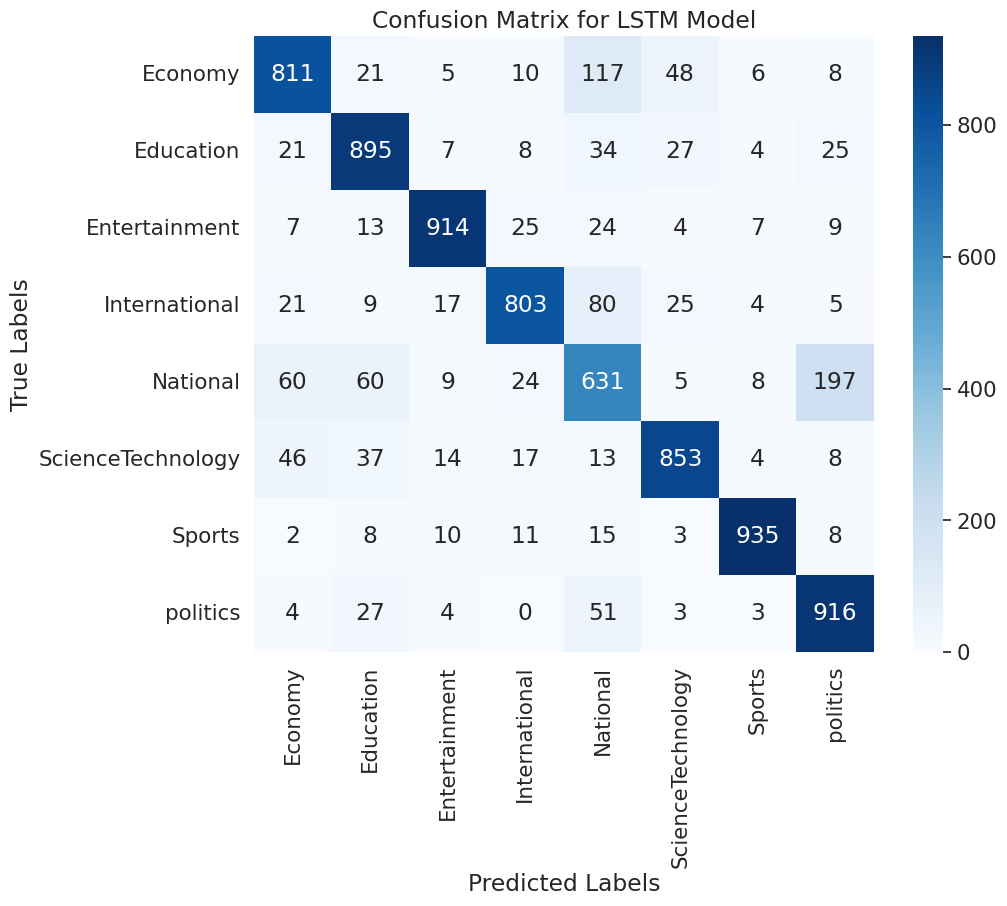

In [34]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict on the test set
y_pred_probs = model.predict(X_test_padded)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)     # Convert probabilities to class labels

# Convert one-hot encoded test labels back to single integer labels
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LSTM Model')
plt.show()


In [35]:
import numpy as np

# Function to preprocess and predict the category of a new sentence
def predict_category(text):
    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Get prediction from the model
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label



# Example sentences for each category (these are placeholders, replace with actual examples if available)
example_sentences = [
    "চলতি বছরের জানুয়ারি থেকে সেপ্টেম্বর পর্যন্ত ৯ মাসে সিটি ব্যাংকের সমন্বিত পরিচালন মুনাফা বেড়েছে। গত বছরের একই সময়ে তুলনায় পরিচালনা মুনাফা বেড়েছে ৭৭ শতাংশ। ২০২৩ সালের প্রথম ৯ মাসে সিটি ব্যাংক মুনাফা করেছিল ৯৩২ কোটি টাকা; এবার তা বেড়ে দাঁড়িয়েছে ১ হাজার ৬৫৩ কোটি টাকা। সতর্কতার সঙ্গে ঋণের বিপরীতে বেশি প্রভিশন সংরক্ষণের কারণে কর–পরবর্তী মুনাফা বেড়েছে ১৯ শতাংশ। গত বছর প্রথম ৯ মাসে এ মুনাফা ছিল ৩৭৯ কোটি টাকা, এবার যা বেড়ে দাঁড়িয়েছে ৪৫১ কোটি টাকা। খবর বিজ্ঞপ্তি।",  # Economy


    "শিক্ষার্থীদের রাস্তায় জনদুর্ভোগ তৈরি না করে ধৈর্য ধরার ও নিজ নিজ শিক্ষাঙ্গনে ফিরে যাওয়ার অনুরোধ করেছেন শিক্ষা উপদেষ্টা অধ্যাপক ওয়াহিদউদ্দিন মাহমুদ। ঢাকার সাত কলেজের শিক্ষার্থীদের আন্দোলন এবং অন্যান্য শিক্ষাসংশ্লিষ্ট বিষয়ে  আন্দোলন শিক্ষা ও পরিকল্পনা উপদেষ্টা ওয়াহিদউদ্দিন মাহমুদ আজ এক বিবৃতিতে এ আহ্বান জানান। আজ বুধবার এ বিবৃতি দেন শিক্ষা উপদেষ্টা।বিবৃতিতে বলা হয়, অন্তর্বর্তী সরকার গঠনের পর থেকেই বিভিন্ন শিক্ষাপ্রতিষ্ঠানের ছাত্র এবং বিভিন্ন শিক্ষক সংগঠন নানা দাবি নিয়ে আন্দোলন করে যাচ্ছে। একটি সম্পূর্ণ বিশৃঙ্খল অবস্থা পাওয়া শিক্ষা খাতে শৃঙ্খলা ও স্বাভাবিক পরিবেশ ফিরিয়ে আনার জন্য সরকার যথাসাধ্য চেষ্টা করছে। এসব দাবিদাওয়ার মধ্যে ন্যায্য-অন্যায্য এবং কিছু ক্ষেত্রে পরস্পরবিরোধী দাবিও আছে। একটি বৈষম্যবিরোধী দাবি মানলে অন্যান্য ক্ষেত্রে বৈষম্য তৈরি হতে পারে। শিক্ষা খাতের যেকোনো গুরুত্বপূর্ণ সংস্কারের দাবি পূরণের সুদূরপ্রসারী প্রভাব থাকে এবং এর জন্য তাৎক্ষণিক সমাধান দেওয়া কঠিন। অথচ সব কটি দাবির পেছনের আন্দোলনকারীরা তাঁদের দাবিকেই সবচেয়ে অগ্রাধিকার হিসেবে দেখছেন এবং দাবিগুলোকে শুধু রাস্তায় আন্দোলন করে তাৎক্ষণিক সমাধানযোগ্য মনে করছেন। এতে একদিকে যেমন রাস্তা অবরোধের ফলে অপরিসীম জনদুর্ভোগ হচ্ছে, সরকারও দাবিগুলো যথাযথ বিবেচনার সুযোগ পাচ্ছে না।",  # Education


    "পুরোমাত্রার বাণিজ্যিক ছবিতে তাঁকে যেমন দেখা যায়, তেমনি করেছেন ভিন্ন ধারার ছবিও। তাই ‘রকি অউর রানি কি প্রেমকাহিনি’ যেমন করেছেন, তেমনি আলিয়াকে পাওয়া গেছে ‘হাইওয়ে’ বা ‘রাজি’র মতো সিনেমায়। তবে একটা ক্ষেত্রে আলিয়া ভাটের আলাদা সুখ্যাতি ছিল, তাঁর অভিনীত সিনেমা মানেই বক্স অফিসে নিশ্চিত ১০০ কোটি আয়। এবার অবশ্য এ নিয়মের ব্যতিক্রম হলো।",  # Entertainment

    "যুক্তরাষ্ট্রের প্রেসিডেন্ট নির্বাচনে দোদুল্যমান অঙ্গরাজ্যগুলোর মধ্যে পেনসিলভানিয়া ও মিশিগান তুলনামূলকভাবে বেশি গুরুত্বপূর্ণ। ডেমোক্রেটিক পার্টির প্রেসিডেন্ট প্রার্থী কমলা হ্যারিস নির্বাচনী প্রচারণা শেষ করেছেন পেনসিলভানিয়াতে। আর রিপাবলিকান পার্টির প্রার্থী ডোনাল্ড ট্রাম্প প্রচারণা শেষ করেছেন মিশিগানে। বলা হয়, দোদুল্যমান সাতটি অঙ্গরাজ্য মার্কিন প্রেসিডেন্ট নির্বাচনের ফল নির্ধারণ করে দেয়। এ সাত অঙ্গরাজ্যের মধ্যে পেনসিলভানিয়া ও মিশিগানের প্রাথমিক গুরুত্ব হলো তাদের ইলেকটোরাল কলেজ ভোট ও সাধারণ (পপুলার) ভোটের সংখ্যা।",  # International

    "চট্টগ্রামের সীতাকুণ্ডের ভাটিয়ারী ইউনিয়নের শহীদ মিনার এলাকায় ঢাকা-চট্টগ্রাম মহাসড়ক প্রায় পৌনে দুই ঘণ্টা ধরে অবরোধ করে রেখেছিলেন স্থানীয় বাসিন্দারা। আজ মঙ্গলবার দুপুর ১২টার দিকে ওই এলাকার বাসিন্দারা মহাসড়কে অবস্থান নিয়ে যানবাহন চলাচল বন্ধ করে দেন। প্রশাসন বলছে, একটি বাড়ির রাস্তা নিয়ে সেনাবাহিনীর সঙ্গে স্থানীয় লোকজনের বিরোধের জের ধরে এ অবরোধ করা হয়। পরে বেলা পৌনে দুইটার দিকে প্রশাসনের আশ্বাসে মহাসড়ক থেকে অবরোধ তুলে নেন তাঁরা। অবরোধের ফলে মহাসড়কের উভয় দিকে অন্তত ৩০ কিলোমিটার এলাকায় যানজটের সৃষ্টি হয়।",  # National

    "অ্যান্ড্রয়েড অপারেটিং সিস্টেমে চলা স্মার্টফোনের বিভিন্ন সুবিধা ব্যবহার করা যায় না অ্যাপলের তৈরি আইফোন এবং ম্যাক কম্পিউটারে। আর তাই আইওএস অপারেটিং সিস্টেমে চলা আইফোন ও ম্যাক কম্পিউটারের জন্য নিজেদের জনপ্রিয় ফাইল শেয়ারিং সুবিধা ‘কুইক শেয়ার’ উন্মুক্ত করতে যাচ্ছে গুগল। নতুন এ সুবিধা চালু হলে আইফোন ও ম্যাক কম্পিউটার ব্যবহারকারীরা অ্যান্ড্রয়েড স্মার্টফোনের আদলে দ্রুত দুটি যন্ত্রের মধ্যে ফাইল আদান–প্রদান করতে পারবেন।",  # ScienceTechnology


    "বোলিংয়ে বাংলাদেশের মোহাম্মদ রফিক, ব্যাটিংয়ে দক্ষিণ আফ্রিকার বোয়েটা ডিপেনার। প্রথম বলেই কাভারে যুবরাজ সিংয়ের হাতে ক্যাচ। ভারতের মহেন্দ্র সিং ধোনি, শ্রীলঙ্কার সনাৎ জয়াসুরিয়া আর পাকিস্তানের মোহাম্মদ ইউসুফরা মাঠের বিভিন্ন প্রান্ত থেকে ছুটে এসে অভিনন্দন জানালেন রফিককে।ঘটনাটি ২০০৭ সালের ১০ জুনের। ক্রিকেট–দুনিয়ায় তখনো আইপিএল আসেনি। একই জার্সিতে কয়েকটি দেশের খেলোয়াড়দের একসঙ্গে খেলতে দেখার ঘটনা নিয়মিত দেখা যেত না। চেন্নাইয়ের এমএ চিদাম্বরম স্টেডিয়ামে সেদিন রফিক, যুবরাজ, জয়াসুরিয়া আর ইউসুফরা এক দল হয়ে খেলতে নেমেছিলেন এশিয়া একাদশের হয়ে। প্রতিপক্ষ ছিল আফ্রিকা একাদশ। ডিপেনারটিসহ রফিকের ৪ উইকেট নেওয়া ম্যাচটি ছিল আফ্রো–এশিয়া কাপ তিন ওয়ানডে সিরিজের শেষ ম্যাচ। এখন পর্যন্ত সর্বশেষও।",  # Sports

    "মৌলভীবাজার জেলা বিএনপির পূর্ণাঙ্গ কমিটি ভেঙে দিয়ে আহ্বায়ক কমিটির নাম ঘোষণা করেছে কেন্দ্রীয় কমিটি। ৩২ সদস্যবিশিষ্ট কমিটির আহ্বায়ক করা হয়েছে জেলা বিএনপির সাবেক জ্যেষ্ঠ সহসভাপতি ও মৌলভীবাজার পৌরসভার সাবেক মেয়র ফয়জুল করিমকে। কমিটির অন্যরা সবাই সদস্য।গতকাল সোমবার বিএনপির কেন্দ্রীয় কমিটির জ্যেষ্ঠ যুগ্ম মহাসচিব রুহুল কবির রিজভীর স্বাক্ষরে নতুন আহ্বায়ক কমিটির নাম ঘোষণা করা হয়। কমিটিতে সদস্য হিসেবে আছেন জেলা বিএনপির সাবেক সভাপতি ও সাবেক সংসদ সদস্য এম নাসের রহমান, সাবেক সাধারণ সম্পাদক মিজানুর রহমান। ।",  # Politics

]
print("This is lstm model : ")

# Predict categories for each example sentence
for i, sentence in enumerate(example_sentences, 1):
    predicted_category = predict_category(sentence)
    print(f"Sentence {i}: {sentence}")
    print(f"Predicted Category: {predicted_category}\n")


This is lstm model : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sentence 1: চলতি বছরের জানুয়ারি থেকে সেপ্টেম্বর পর্যন্ত ৯ মাসে সিটি ব্যাংকের সমন্বিত পরিচালন মুনাফা বেড়েছে। গত বছরের একই সময়ে তুলনায় পরিচালনা মুনাফা বেড়েছে ৭৭ শতাংশ। ২০২৩ সালের প্রথম ৯ মাসে সিটি ব্যাংক মুনাফা করেছিল ৯৩২ কোটি টাকা; এবার তা বেড়ে দাঁড়িয়েছে ১ হাজার ৬৫৩ কোটি টাকা। সতর্কতার সঙ্গে ঋণের বিপরীতে বেশি প্রভিশন সংরক্ষণের কারণে কর–পরবর্তী মুনাফা বেড়েছে ১৯ শতাংশ। গত বছর প্রথম ৯ মাসে এ মুনাফা ছিল ৩৭৯ কোটি টাকা, এবার যা বেড়ে দাঁড়িয়েছে ৪৫১ কোটি টাকা। খবর বিজ্ঞপ্তি।
Predicted Category: Economy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sentence 2: শিক্ষার্থীদের রাস্তায় জনদুর্ভোগ তৈরি না করে ধৈর্য ধরার ও নিজ নিজ শিক্ষাঙ্গনে ফিরে যাওয়ার অনুরোধ করেছেন শিক্ষা উপদেষ্টা অধ্যাপক ওয়াহিদউদ্দিন মাহমুদ। ঢাকার সাত কলেজের শিক্ষার্থীদের আন্দোলন এবং অন্যান্য শিক্ষাসংশ্লিষ্ট বিষয়ে  আন্দোলন শিক্ষা ও পরিকল্পনা উপদেষ্টা ওয়াহিদউদ্দিন মাহমুদ আজ এক বিবৃতিতে এ আহ্বান জানান। আজ বুধবার এ বিবৃতি দেন শিক্ষা উপদেষ্টা।বিবৃতিতে বলা হয়, অন্তর্বর্তী সরকার গঠনের প

In [36]:
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to preprocess and predict the category of a new sentence
def predict_category(text):
    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Get prediction from the model
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label


# Gradio interface function
def gradio_interface(text):
    return predict_category(text)

# Initialize Gradio Interface
iface = gr.Interface(fn=gradio_interface,
                     inputs="text",  # Type of input is text
                     outputs="text",  # Output will be a text prediction
                     title="Bengali Newspaper Article Classification",
                     description="Enter a Bengali newspaper article to predict its category.")

# Launch Gradio UI in Colab
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://790d5430c79d9c9487.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# ***CNN MODEL***

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
embedding_dim = 1024  # Adjust as needed for your data
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))  # 128 filters with kernel size 5
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5 # Adjust as needed
history = model.fit(X_train_padded, y_train_categorical, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test_categorical))



Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 257635328 elements. This may consume a large amount of memory.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.4399 - loss: 1.5309 - val_accuracy: 0.8736 - val_loss: 0.4176
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 214ms/step - accuracy: 0.8598 - loss: 0.4641 - val_accuracy: 0.8917 - val_loss: 0.3487
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.9310 - loss: 0.2423 - val_accuracy: 0.8965 - val_loss: 0.3633
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 212ms/step - accuracy: 0.9586 - loss: 0.1503 - val_accuracy: 0.8900 - val_loss: 0.4019
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 214ms/step - accuracy: 0.9729 - loss: 0.0973 - val_accuracy: 0.8892 - val_loss: 0.4518


In [38]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8852 - loss: 0.4661
Test Accuracy: 88.92%


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8852 - loss: 0.4661
Test Accuracy: 88.92%
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Classification Report:
                   precision    recall  f1-score   support

          Economy       0.85      0.86      0.85      1026
        Education       0.90      0.90      0.90      1021
    Entertainment       0.94      0.95      0.94      1003
    International       0.91      0.90      0.90       964
         National       0.76      0.75      0.76       994
ScienceTechnology       0.91      0.89      0.90       992
           Sports       0.97      0.97      0.97       992
         politics       0.88      0.90      0.89      1008

         accuracy                           0.89      8000
        macro avg       0.89      0.89      0.89      8000
     weighted avg       0.89      0.89      0.89      8000



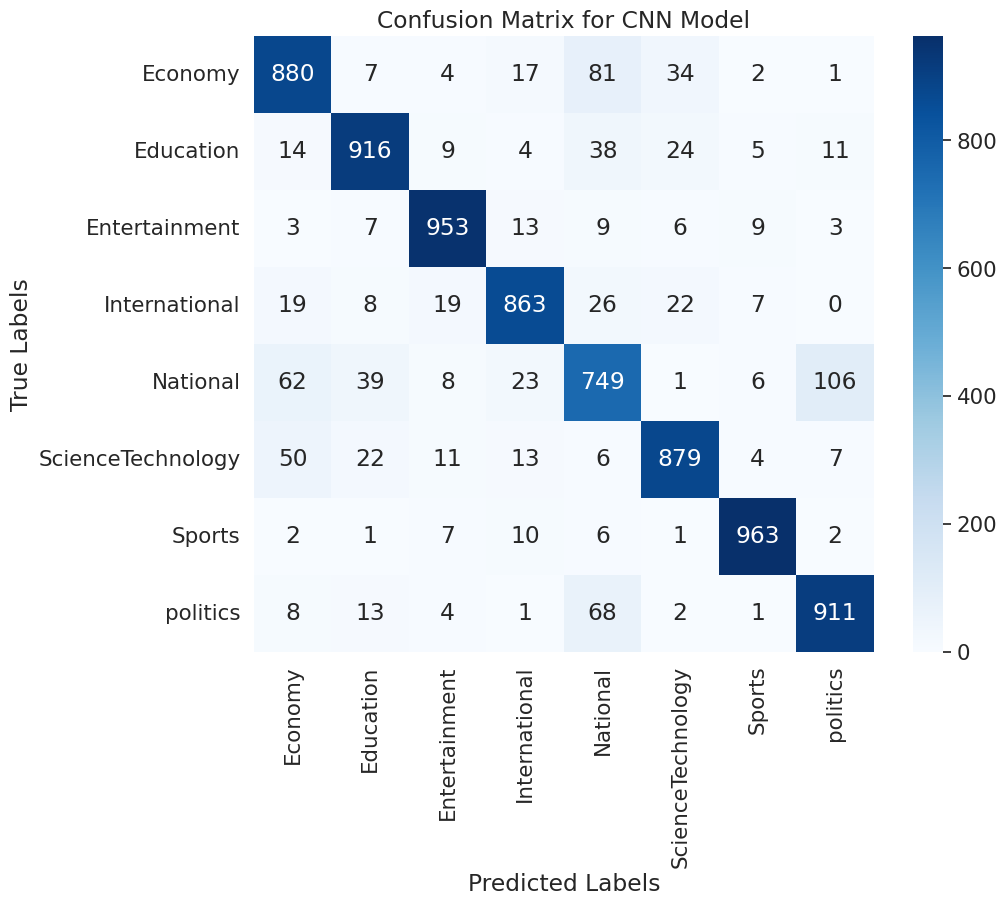

In [39]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict on the test set
y_pred_probs = model.predict(X_test_padded)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)     # Convert probabilities to class labels

# Convert one-hot encoded test labels back to single integer labels
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN Model')
plt.show()


In [40]:
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to preprocess and predict the category of a new sentence
def predict_category(text):
    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Get prediction from the model
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label


# Gradio interface function
def gradio_interface(text):
    return predict_category(text)

# Initialize Gradio Interface
iface = gr.Interface(fn=gradio_interface,
                     inputs="text",  # Type of input is text
                     outputs="text",  # Output will be a text prediction
                     title="Bengali Newspaper Article Classification",
                     description="Enter a Bengali newspaper article to predict its category.")

# Launch Gradio UI in Colab
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fe28147fcad0e4e066.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# ***HYBRID MODEL***

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN+LSTM model
embedding_dim = 1024  # Adjust as needed for your data
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))  # 128 filters with kernel size 5
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))  # LSTM layer with 64 units
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5  # Adjust as needed
history = model.fit(X_train_padded, y_train_categorical, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test_categorical))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 257635328 elements. This may consume a large amount of memory.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 310ms/step - accuracy: 0.5781 - loss: 1.2388 - val_accuracy: 0.8669 - val_loss: 0.4219
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 316ms/step - accuracy: 0.9183 - loss: 0.3032 - val_accuracy: 0.8865 - val_loss: 0.3894
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 307ms/step - accuracy: 0.9573 - loss: 0.1652 - val_accuracy: 0.8539 - val_loss: 0.5534
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 307ms/step - accuracy: 0.9763 - loss: 0.0961 - val_accuracy: 0.8701 - val_loss: 0.5557
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 306ms/step - accuracy: 0.9868 - loss: 0.0540 - val_accuracy: 0.8744 - val_loss: 0.5944


In [42]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8751 - loss: 0.6016
Test Accuracy: 87.44%


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8751 - loss: 0.6016
Test Accuracy: 87.44%
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
Classification Report:
                   precision    recall  f1-score   support

          Economy       0.86      0.83      0.85      1026
        Education       0.84      0.91      0.88      1021
    Entertainment       0.94      0.94      0.94      1003
    International       0.89      0.89      0.89       964
         National       0.76      0.67      0.71       994
ScienceTechnology       0.89      0.89      0.89       992
           Sports       0.97      0.97      0.97       992
         politics       0.84      0.90      0.87      1008

         accuracy                           0.87      8000
        macro avg       0.87      0.87      0.87      8000
     weighted avg       0.87      0.87      0.87      8000



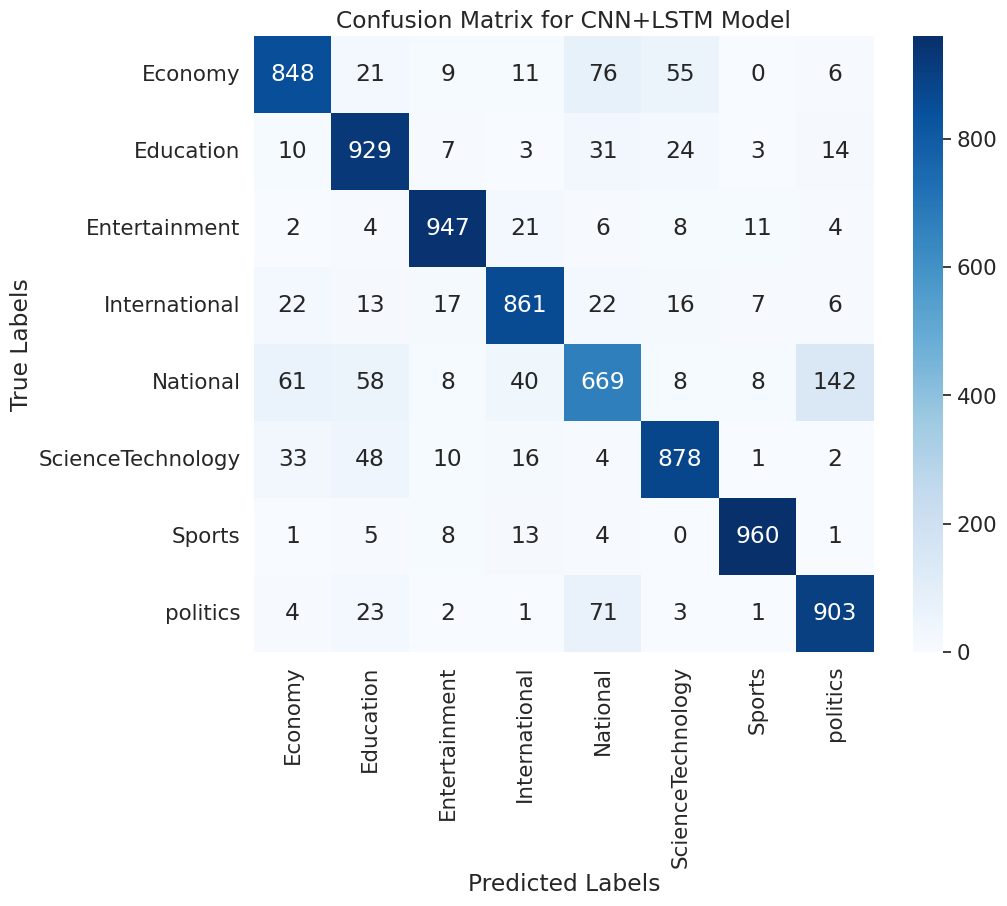

In [43]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict on the test set
y_pred_probs = model.predict(X_test_padded)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)     # Convert probabilities to class labels

# Convert one-hot encoded test labels back to single integer labels
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN+LSTM Model')
plt.show()


In [44]:
import numpy as np

# Function to preprocess and predict the category of a new sentence
def predict_category(text):
    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Get prediction from the model
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label



# Example sentences for each category (these are placeholders, replace with actual examples if available)
example_sentences = [
    "চলতি বছরের জানুয়ারি থেকে সেপ্টেম্বর পর্যন্ত ৯ মাসে সিটি ব্যাংকের সমন্বিত পরিচালন মুনাফা বেড়েছে। গত বছরের একই সময়ে তুলনায় পরিচালনা মুনাফা বেড়েছে ৭৭ শতাংশ। ২০২৩ সালের প্রথম ৯ মাসে সিটি ব্যাংক মুনাফা করেছিল ৯৩২ কোটি টাকা; এবার তা বেড়ে দাঁড়িয়েছে ১ হাজার ৬৫৩ কোটি টাকা। সতর্কতার সঙ্গে ঋণের বিপরীতে বেশি প্রভিশন সংরক্ষণের কারণে কর–পরবর্তী মুনাফা বেড়েছে ১৯ শতাংশ। গত বছর প্রথম ৯ মাসে এ মুনাফা ছিল ৩৭৯ কোটি টাকা, এবার যা বেড়ে দাঁড়িয়েছে ৪৫১ কোটি টাকা। খবর বিজ্ঞপ্তি।",  # Economy


    "শিক্ষার্থীদের রাস্তায় জনদুর্ভোগ তৈরি না করে ধৈর্য ধরার ও নিজ নিজ শিক্ষাঙ্গনে ফিরে যাওয়ার অনুরোধ করেছেন শিক্ষা উপদেষ্টা অধ্যাপক ওয়াহিদউদ্দিন মাহমুদ। ঢাকার সাত কলেজের শিক্ষার্থীদের আন্দোলন এবং অন্যান্য শিক্ষাসংশ্লিষ্ট বিষয়ে  আন্দোলন শিক্ষা ও পরিকল্পনা উপদেষ্টা ওয়াহিদউদ্দিন মাহমুদ আজ এক বিবৃতিতে এ আহ্বান জানান। আজ বুধবার এ বিবৃতি দেন শিক্ষা উপদেষ্টা।বিবৃতিতে বলা হয়, অন্তর্বর্তী সরকার গঠনের পর থেকেই বিভিন্ন শিক্ষাপ্রতিষ্ঠানের ছাত্র এবং বিভিন্ন শিক্ষক সংগঠন নানা দাবি নিয়ে আন্দোলন করে যাচ্ছে। একটি সম্পূর্ণ বিশৃঙ্খল অবস্থা পাওয়া শিক্ষা খাতে শৃঙ্খলা ও স্বাভাবিক পরিবেশ ফিরিয়ে আনার জন্য সরকার যথাসাধ্য চেষ্টা করছে। এসব দাবিদাওয়ার মধ্যে ন্যায্য-অন্যায্য এবং কিছু ক্ষেত্রে পরস্পরবিরোধী দাবিও আছে। একটি বৈষম্যবিরোধী দাবি মানলে অন্যান্য ক্ষেত্রে বৈষম্য তৈরি হতে পারে। শিক্ষা খাতের যেকোনো গুরুত্বপূর্ণ সংস্কারের দাবি পূরণের সুদূরপ্রসারী প্রভাব থাকে এবং এর জন্য তাৎক্ষণিক সমাধান দেওয়া কঠিন। অথচ সব কটি দাবির পেছনের আন্দোলনকারীরা তাঁদের দাবিকেই সবচেয়ে অগ্রাধিকার হিসেবে দেখছেন এবং দাবিগুলোকে শুধু রাস্তায় আন্দোলন করে তাৎক্ষণিক সমাধানযোগ্য মনে করছেন। এতে একদিকে যেমন রাস্তা অবরোধের ফলে অপরিসীম জনদুর্ভোগ হচ্ছে, সরকারও দাবিগুলো যথাযথ বিবেচনার সুযোগ পাচ্ছে না।",  # Education


    "পুরোমাত্রার বাণিজ্যিক ছবিতে তাঁকে যেমন দেখা যায়, তেমনি করেছেন ভিন্ন ধারার ছবিও। তাই ‘রকি অউর রানি কি প্রেমকাহিনি’ যেমন করেছেন, তেমনি আলিয়াকে পাওয়া গেছে ‘হাইওয়ে’ বা ‘রাজি’র মতো সিনেমায়। তবে একটা ক্ষেত্রে আলিয়া ভাটের আলাদা সুখ্যাতি ছিল, তাঁর অভিনীত সিনেমা মানেই বক্স অফিসে নিশ্চিত ১০০ কোটি আয়। এবার অবশ্য এ নিয়মের ব্যতিক্রম হলো।",  # Entertainment

    "যুক্তরাষ্ট্রের প্রেসিডেন্ট নির্বাচনে দোদুল্যমান অঙ্গরাজ্যগুলোর মধ্যে পেনসিলভানিয়া ও মিশিগান তুলনামূলকভাবে বেশি গুরুত্বপূর্ণ। ডেমোক্রেটিক পার্টির প্রেসিডেন্ট প্রার্থী কমলা হ্যারিস নির্বাচনী প্রচারণা শেষ করেছেন পেনসিলভানিয়াতে। আর রিপাবলিকান পার্টির প্রার্থী ডোনাল্ড ট্রাম্প প্রচারণা শেষ করেছেন মিশিগানে। বলা হয়, দোদুল্যমান সাতটি অঙ্গরাজ্য মার্কিন প্রেসিডেন্ট নির্বাচনের ফল নির্ধারণ করে দেয়। এ সাত অঙ্গরাজ্যের মধ্যে পেনসিলভানিয়া ও মিশিগানের প্রাথমিক গুরুত্ব হলো তাদের ইলেকটোরাল কলেজ ভোট ও সাধারণ (পপুলার) ভোটের সংখ্যা।",  # International

    "চট্টগ্রামের সীতাকুণ্ডের ভাটিয়ারী ইউনিয়নের শহীদ মিনার এলাকায় ঢাকা-চট্টগ্রাম মহাসড়ক প্রায় পৌনে দুই ঘণ্টা ধরে অবরোধ করে রেখেছিলেন স্থানীয় বাসিন্দারা। আজ মঙ্গলবার দুপুর ১২টার দিকে ওই এলাকার বাসিন্দারা মহাসড়কে অবস্থান নিয়ে যানবাহন চলাচল বন্ধ করে দেন। প্রশাসন বলছে, একটি বাড়ির রাস্তা নিয়ে সেনাবাহিনীর সঙ্গে স্থানীয় লোকজনের বিরোধের জের ধরে এ অবরোধ করা হয়। পরে বেলা পৌনে দুইটার দিকে প্রশাসনের আশ্বাসে মহাসড়ক থেকে অবরোধ তুলে নেন তাঁরা। অবরোধের ফলে মহাসড়কের উভয় দিকে অন্তত ৩০ কিলোমিটার এলাকায় যানজটের সৃষ্টি হয়।",  # National

    "অ্যান্ড্রয়েড অপারেটিং সিস্টেমে চলা স্মার্টফোনের বিভিন্ন সুবিধা ব্যবহার করা যায় না অ্যাপলের তৈরি আইফোন এবং ম্যাক কম্পিউটারে। আর তাই আইওএস অপারেটিং সিস্টেমে চলা আইফোন ও ম্যাক কম্পিউটারের জন্য নিজেদের জনপ্রিয় ফাইল শেয়ারিং সুবিধা ‘কুইক শেয়ার’ উন্মুক্ত করতে যাচ্ছে গুগল। নতুন এ সুবিধা চালু হলে আইফোন ও ম্যাক কম্পিউটার ব্যবহারকারীরা অ্যান্ড্রয়েড স্মার্টফোনের আদলে দ্রুত দুটি যন্ত্রের মধ্যে ফাইল আদান–প্রদান করতে পারবেন।",  # ScienceTechnology


    "বোলিংয়ে বাংলাদেশের মোহাম্মদ রফিক, ব্যাটিংয়ে দক্ষিণ আফ্রিকার বোয়েটা ডিপেনার। প্রথম বলেই কাভারে যুবরাজ সিংয়ের হাতে ক্যাচ। ভারতের মহেন্দ্র সিং ধোনি, শ্রীলঙ্কার সনাৎ জয়াসুরিয়া আর পাকিস্তানের মোহাম্মদ ইউসুফরা মাঠের বিভিন্ন প্রান্ত থেকে ছুটে এসে অভিনন্দন জানালেন রফিককে।ঘটনাটি ২০০৭ সালের ১০ জুনের। ক্রিকেট–দুনিয়ায় তখনো আইপিএল আসেনি। একই জার্সিতে কয়েকটি দেশের খেলোয়াড়দের একসঙ্গে খেলতে দেখার ঘটনা নিয়মিত দেখা যেত না। চেন্নাইয়ের এমএ চিদাম্বরম স্টেডিয়ামে সেদিন রফিক, যুবরাজ, জয়াসুরিয়া আর ইউসুফরা এক দল হয়ে খেলতে নেমেছিলেন এশিয়া একাদশের হয়ে। প্রতিপক্ষ ছিল আফ্রিকা একাদশ। ডিপেনারটিসহ রফিকের ৪ উইকেট নেওয়া ম্যাচটি ছিল আফ্রো–এশিয়া কাপ তিন ওয়ানডে সিরিজের শেষ ম্যাচ। এখন পর্যন্ত সর্বশেষও।",  # Sports

    "মৌলভীবাজার জেলা বিএনপির পূর্ণাঙ্গ কমিটি ভেঙে দিয়ে আহ্বায়ক কমিটির নাম ঘোষণা করেছে কেন্দ্রীয় কমিটি। ৩২ সদস্যবিশিষ্ট কমিটির আহ্বায়ক করা হয়েছে জেলা বিএনপির সাবেক জ্যেষ্ঠ সহসভাপতি ও মৌলভীবাজার পৌরসভার সাবেক মেয়র ফয়জুল করিমকে। কমিটির অন্যরা সবাই সদস্য।গতকাল সোমবার বিএনপির কেন্দ্রীয় কমিটির জ্যেষ্ঠ যুগ্ম মহাসচিব রুহুল কবির রিজভীর স্বাক্ষরে নতুন আহ্বায়ক কমিটির নাম ঘোষণা করা হয়। কমিটিতে সদস্য হিসেবে আছেন জেলা বিএনপির সাবেক সভাপতি ও সাবেক সংসদ সদস্য এম নাসের রহমান, সাবেক সাধারণ সম্পাদক মিজানুর রহমান। ।",  # Politics

]
print("This is Hybrid model : ")

# Predict categories for each example sentence
for i, sentence in enumerate(example_sentences, 1):
    predicted_category = predict_category(sentence)
    print(f"Sentence {i}: {sentence}")
    print(f"Predicted Category: {predicted_category}\n")


This is Hybrid model : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sentence 1: চলতি বছরের জানুয়ারি থেকে সেপ্টেম্বর পর্যন্ত ৯ মাসে সিটি ব্যাংকের সমন্বিত পরিচালন মুনাফা বেড়েছে। গত বছরের একই সময়ে তুলনায় পরিচালনা মুনাফা বেড়েছে ৭৭ শতাংশ। ২০২৩ সালের প্রথম ৯ মাসে সিটি ব্যাংক মুনাফা করেছিল ৯৩২ কোটি টাকা; এবার তা বেড়ে দাঁড়িয়েছে ১ হাজার ৬৫৩ কোটি টাকা। সতর্কতার সঙ্গে ঋণের বিপরীতে বেশি প্রভিশন সংরক্ষণের কারণে কর–পরবর্তী মুনাফা বেড়েছে ১৯ শতাংশ। গত বছর প্রথম ৯ মাসে এ মুনাফা ছিল ৩৭৯ কোটি টাকা, এবার যা বেড়ে দাঁড়িয়েছে ৪৫১ কোটি টাকা। খবর বিজ্ঞপ্তি।
Predicted Category: Economy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sentence 2: শিক্ষার্থীদের রাস্তায় জনদুর্ভোগ তৈরি না করে ধৈর্য ধরার ও নিজ নিজ শিক্ষাঙ্গনে ফিরে যাওয়ার অনুরোধ করেছেন শিক্ষা উপদেষ্টা অধ্যাপক ওয়াহিদউদ্দিন মাহমুদ। ঢাকার সাত কলেজের শিক্ষার্থীদের আন্দোলন এবং অন্যান্য শিক্ষাসংশ্লিষ্ট বিষয়ে  আন্দোলন শিক্ষা ও পরিকল্পনা উপদেষ্টা ওয়াহিদউদ্দিন মাহমুদ আজ এক বিবৃতিতে এ আহ্বান জানান। আজ বুধবার এ বিবৃতি দেন শিক্ষা উপদেষ্টা।বিবৃতিতে বলা হয়, অন্তর্বর্তী সরকার গঠনের

In [45]:
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to preprocess and predict the category of a new sentence
def predict_category(text):
    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Get prediction from the model
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label


# Gradio interface function
def gradio_interface(text):
    return predict_category(text)

# Initialize Gradio Interface
iface = gr.Interface(fn=gradio_interface,
                     inputs="text",  # Type of input is text
                     outputs="text",  # Output will be a text prediction
                     title="Bengali Newspaper Article Classification",
                     description="Enter a Bengali newspaper article to predict its category.")

# Launch Gradio UI in Colab
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://572c8ca4d69eb63a84.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
